In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import nltk
import string

# Télécharger les stopwords si nécessaire
nltk.download('stopwords')

# 1. Préparation des données
# Exemple de corpus simple
corpus = [
    "L'intelligence artificielle est un domaine fascinant.",
    "L'apprentissage profond est une sous-discipline de l'IA.",
    "Les réseaux neuronaux sont au coeur de l'apprentissage profond.",
    "La NLP est une application importante de l'intelligence artificielle.",
    "Word2Vec est un modèle populaire pour la représentation des mots."
]

# Nettoyage et tokenisation des phrases
def preprocess_text(corpus):
    stop_words = set(stopwords.words('french'))  # Stopwords en français
    cleaned_corpus = []

    for sentence in corpus:
        tokens = simple_preprocess(sentence, deacc=True)  # Supprime la ponctuation
        tokens = [word for word in tokens if word not in stop_words]  # Supprime les stopwords
        cleaned_corpus.append(tokens)

    return cleaned_corpus

cleaned_corpus = preprocess_text(corpus)
print("Corpus nettoyé:", cleaned_corpus)

Corpus nettoyé: [['intelligence', 'artificielle', 'domaine', 'fascinant'], ['apprentissage', 'profond', 'sous', 'discipline', 'ia'], ['reseaux', 'neuronaux', 'coeur', 'apprentissage', 'profond'], ['nlp', 'application', 'importante', 'intelligence', 'artificielle'], ['word', 'vec', 'modele', 'populaire', 'representation', 'mots']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vecteur pour 'intelligence':
 [-5.3539843e-04  2.3627708e-04  5.1038335e-03  9.0092253e-03
 -9.3028042e-03 -7.1160258e-03  6.4590201e-03  8.9725936e-03
 -5.0156550e-03 -3.7627078e-03  7.3799514e-03 -1.5338523e-03
 -4.5364592e-03  6.5546385e-03 -4.8603979e-03 -1.8166025e-03
  2.8758608e-03  9.9307380e-04 -8.2854824e-03 -9.4489129e-03
  7.3114806e-03  5.0700493e-03  6.7572608e-03  7.6223729e-04
  6.3511380e-03 -3.4055517e-03 -9.4602868e-04  5.7680593e-03
 -7.5219860e-03 -3.9358870e-03 -7.5120302e-03 -9.3050854e-04
  9.5381094e-03 -7.3196352e-03 -2.3337796e-03 -1.9384573e-03
  8.0770813e-03 -5.9306161e-03  4.5771281e-05 -4.7544064e-03
 -9.6039837e-03  5.0066300e-03 -8.7601822e-03 -4.3912111e-03
 -3.5469078e-05 -2.9639245e-04 -7.6612392e-03  9.6144518e-03
  4.9819658e-03  9.2330268e-03 -8.1581175e-03  4.4950419e-03
 -4.1364981e-03  8.2445715e-04  8.4985532e-03 -4.4616391e-03
  4.5177354e-03 -6.7874417e-03 -3.5493653e-03  9.3987007e-03
 -1.5776252e-03  3.2066903e-04 -4.1414867e-03 -7.682886

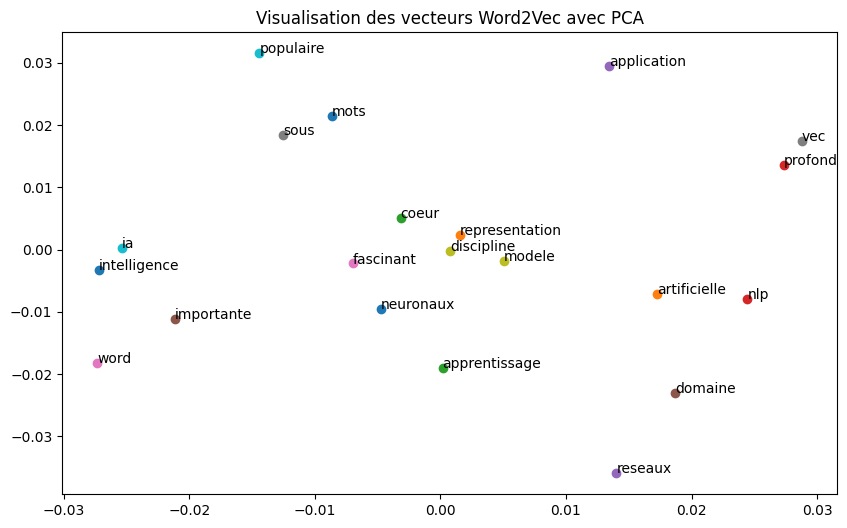

In [ ]:
word = "intelligence"
if word in model.wv:
    print(f"Vecteur pour '{word}':\n", model.wv[word])
else:
    print(f"Le mot '{word}' n'est pas dans le vocabulaire.")

# Trouver les mots similaires
similar_words = model.wv.most_similar("intelligence", topn=5)
print("Mots similaires à 'intelligence':", similar_words)

# Visualisation des vecteurs avec PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_word_vectors(model):
    words = list(model.wv.index_to_key)
    vectors = [model.wv[word] for word in words]

    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    plt.figure(figsize=(10, 6))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title("Visualisation des vecteurs Word2Vec avec PCA")
    plt.show()

plot_word_vectors(model)